In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv("AirPassengers.csv")

In [4]:
data

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [5]:
data.isnull().sum()

Month          0
#Passengers    0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [7]:
data["Month"]=pd.to_datetime(data["Month"])

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [11]:
data.set_index("Month",inplace=True)

In [12]:
data

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


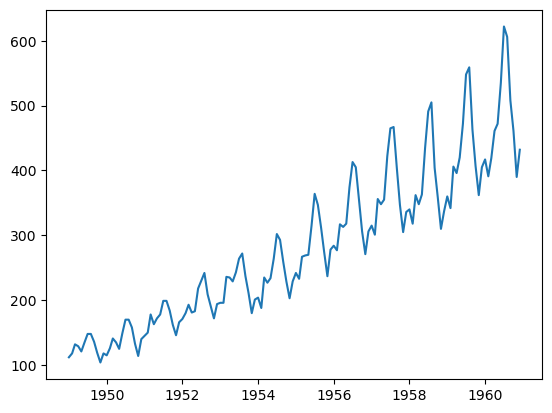

In [13]:
plt.plot(data)

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [15]:
decomposition=seasonal_decompose(data["#Passengers"])

Figure(640x480)


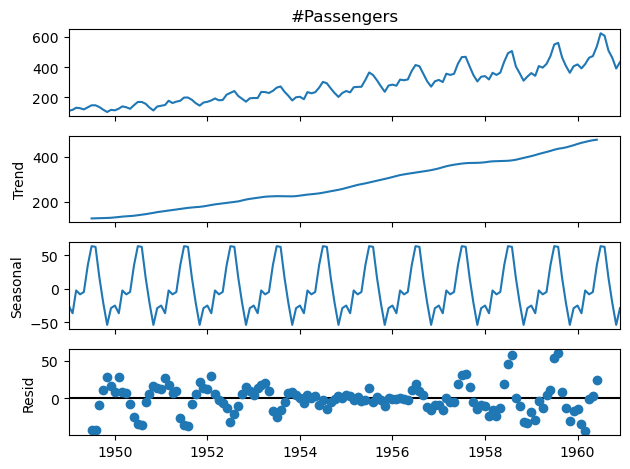

In [16]:
print(decomposition.plot())

In [29]:
data.head(20)

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136


In [ ]:
ad-fuller Test
Dickey Fuller Test

In [ ]:
# Hypothesis testing to check the stationarity of the data

In [ ]:
# ad-fuller Test-
# H0(null hypothesis)= data is non stationary
# HA(alternate hypothesis)=data is stationary

# if p value is more than 0.05 accept the null hypothesis

In [18]:
from statsmodels.tsa.stattools import adfuller

In [19]:
results=adfuller(data)

In [24]:
p_values=results[1]

In [25]:
p_values

0.9918802434376411

In [ ]:
# as the p values is more than 0.05, data is non stationary

In [ ]:
# Now we have ot make the data stationary so that we can appply the ARIMA

# LETS MAKE DATA STATIONARY :

In [26]:
# Rolling mean
mean_log=data.rolling(window=12).mean()
std_log=data.rolling(window=12).std()

In [28]:
mean_log.head(20)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


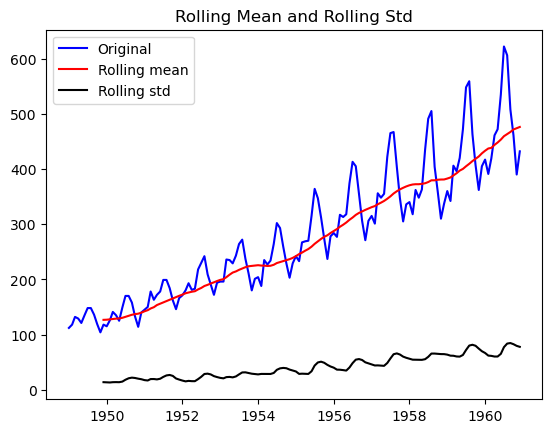

In [30]:
plt.plot(data,color = 'blue',label = 'Original')
plt.plot(mean_log,color = 'red',label = 'Rolling mean')
plt.plot(std_log,color = 'black',label = 'Rolling std')
plt.legend(loc = 'best')
plt.title('Rolling Mean and Rolling Std')
plt.show()

In [31]:
# Transformation for making the data stationary
df_log=np.log(data)

In [32]:
mean_log=df_log.rolling(window=12).mean()
std_log=df_log.rolling(window=12).std()

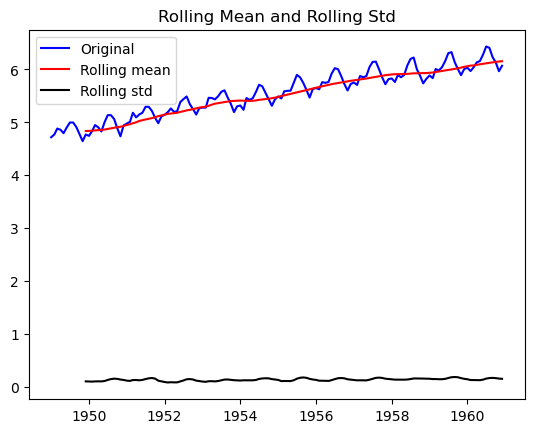

In [33]:
plt.plot(df_log,color = 'blue',label = 'Original')
plt.plot(mean_log,color = 'red',label = 'Rolling mean')
plt.plot(std_log,color = 'black',label = 'Rolling std')
plt.legend(loc = 'best')
plt.title('Rolling Mean and Rolling Std')
plt.show()

In [34]:
new_data=df_log-mean_log

In [37]:
new_data.head(20)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


In [38]:
new_data.dropna(inplace=True)

In [39]:
new_data

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
...,...
1960-08-01,0.282363
1960-09-01,0.098235
1960-10-01,-0.009230


In [41]:
mean_log=new_data.rolling(window=12).mean()
std_log=new_data.rolling(window=12).std()

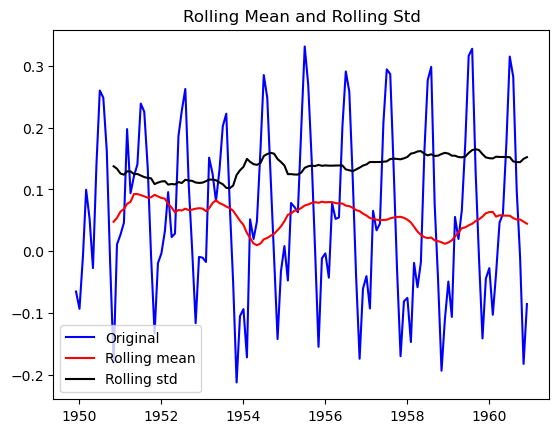

In [42]:
plt.plot(new_data,color = 'blue',label = 'Original')
plt.plot(mean_log,color = 'red',label = 'Rolling mean')
plt.plot(std_log,color = 'black',label = 'Rolling std')
plt.legend(loc = 'best')
plt.title('Rolling Mean and Rolling Std')
plt.show()

In [43]:
# Hypothesis testing to check the stationarity of the data

In [44]:
results=adfuller(new_data)

In [45]:
p_values=results[1]

In [46]:
p_values

0.02223463000124264

In [ ]:
# as the p values is less than 0.05, data is stationary now

# Model building for Time Series Forecasting

In [ ]:
p- moving averages
d= differencing
q= autoregressive

In [47]:
# let's split the data for the training and testing purpose

In [48]:
new_data

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
...,...
1960-08-01,0.282363
1960-09-01,0.098235
1960-10-01,-0.009230


In [49]:
train=new_data.iloc[:120,:]["#Passengers"]
test=new_data.iloc[120:,:]["#Passengers"]

In [50]:
train

Month
1949-12-01   -0.065494
1950-01-01   -0.093449
1950-02-01   -0.007566
1950-03-01    0.099416
1950-04-01    0.052142
                ...   
1959-07-01    0.316430
1959-08-01    0.327838
1959-09-01    0.128057
1959-10-01   -0.011315
1959-11-01   -0.141406
Name: #Passengers, Length: 120, dtype: float64

In [51]:
test

Month
1959-12-01   -0.044481
1960-01-01   -0.027530
1960-02-01   -0.103067
1960-03-01   -0.036530
1960-04-01    0.046332
1960-05-01    0.060186
1960-06-01    0.175033
1960-07-01    0.315151
1960-08-01    0.282363
1960-09-01    0.098235
1960-10-01   -0.009230
1960-11-01   -0.182690
1960-12-01   -0.085789
Name: #Passengers, dtype: float64

In [52]:
from statsmodels.tsa.arima.model import ARIMA

In [66]:
model= ARIMA(train,order=(7,1,7))#random experiment with pdq values

C:\Users\tarun\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\tarun\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\tarun\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [67]:
model=model.fit()

C:\Users\tarun\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [68]:
new_data['predict']=model.predict(start=len(train),end=len(train)+len(test)-1)


In [69]:
new_data

,#Passengers,predict
Month,,
1949-12-01,-0.065494,NaN
1950-01-01,-0.093449,NaN
1950-02-01,-0.007566,NaN
1950-03-01,0.099416,NaN
1950-04-01,0.052142,NaN
...,...,...
1960-08-01,0.282363,0.197447
1960-09-01,0.098235,0.092435
1960-10-01,-0.009230,0.022620


<Axes: xlabel='Month'>

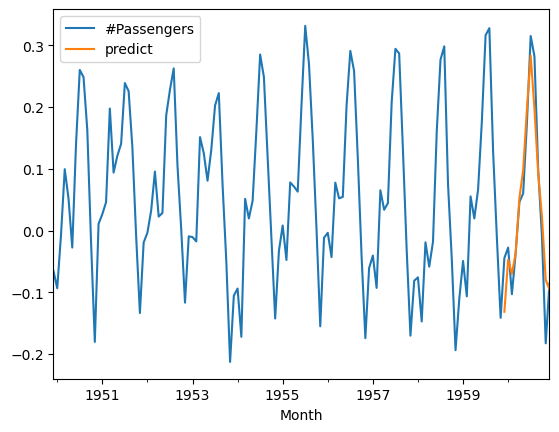

In [70]:
new_data[['#Passengers','predict']].plot()